## Тренируюсь на make_moons

In [220]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_moons

In [221]:
X, y = make_moons(n_samples=5000, shuffle=True, noise=0.1, random_state=101)

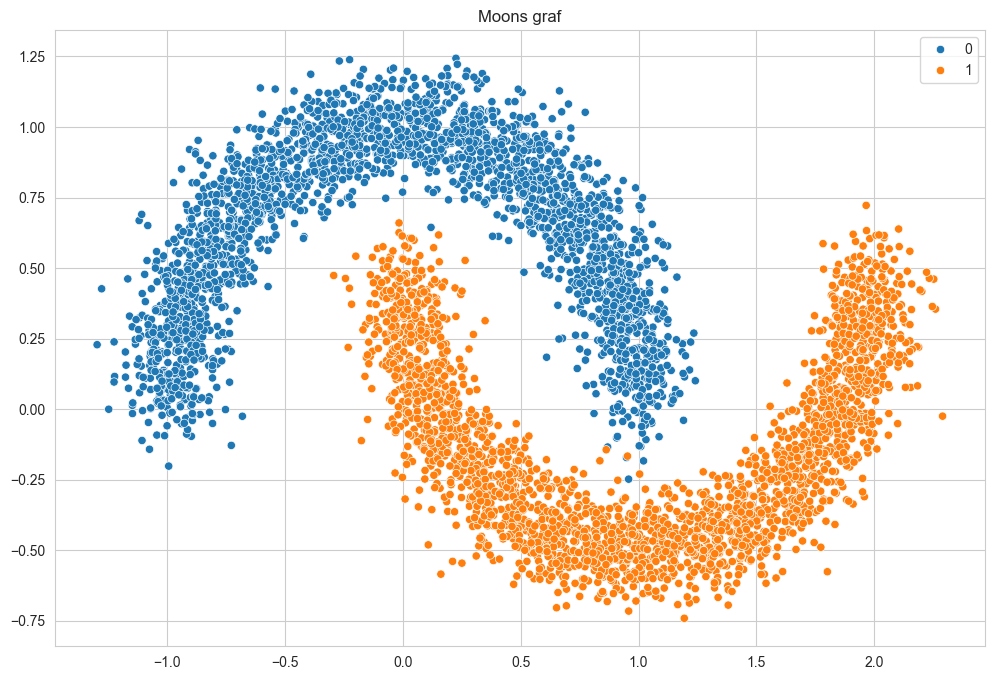

In [222]:
def draw_moons(X, y, name="Moons graf"):
    plt.figure(figsize=(12, 8))
    plt.title(name)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

draw_moons(X, y)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [224]:
scaler = StandardScaler()

In [225]:
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

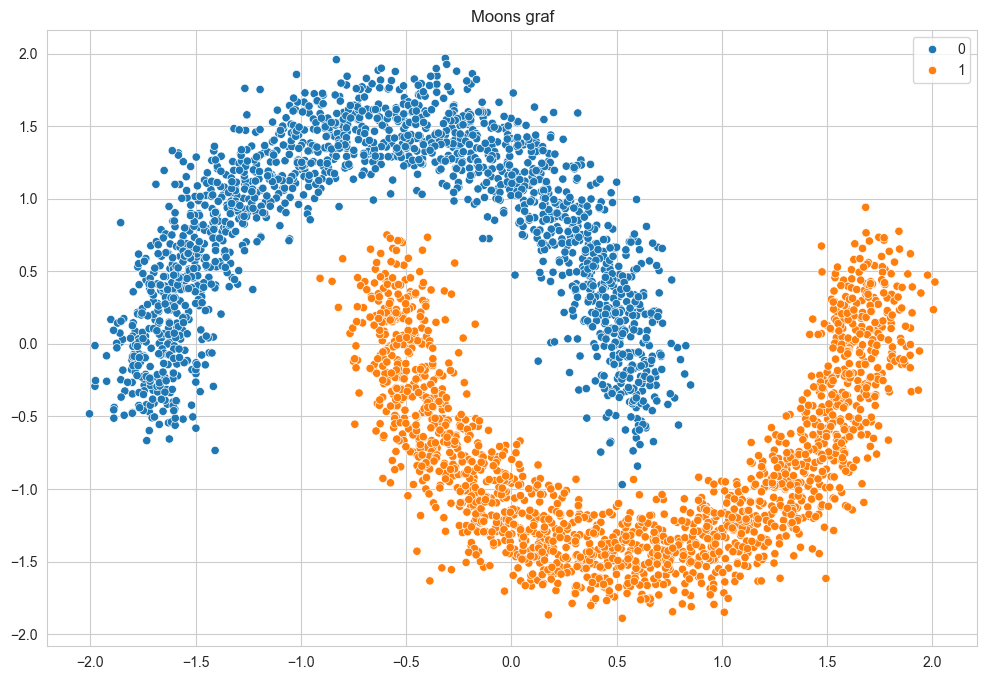

In [226]:
draw_moons(X_train_transformed, y_train)

In [227]:
log_reg_model = LogisticRegression()
log_reg_model

LogisticRegression()

In [228]:
log_reg_model.fit(X_train_transformed, y_train)

LogisticRegression()

## F1 score для модели логистической регрессии)

In [229]:
f1_score(y_test, log_reg_model.predict(X_test))

0.8610919143054596

## Accuracy_score для модели логистической регрессии)

In [230]:
accuracy_score(y_test, log_reg_model.predict(X_test))

0.866

In [231]:
line = log_reg_model.coef_.reshape(2, 1) * np.array([-1, 1])

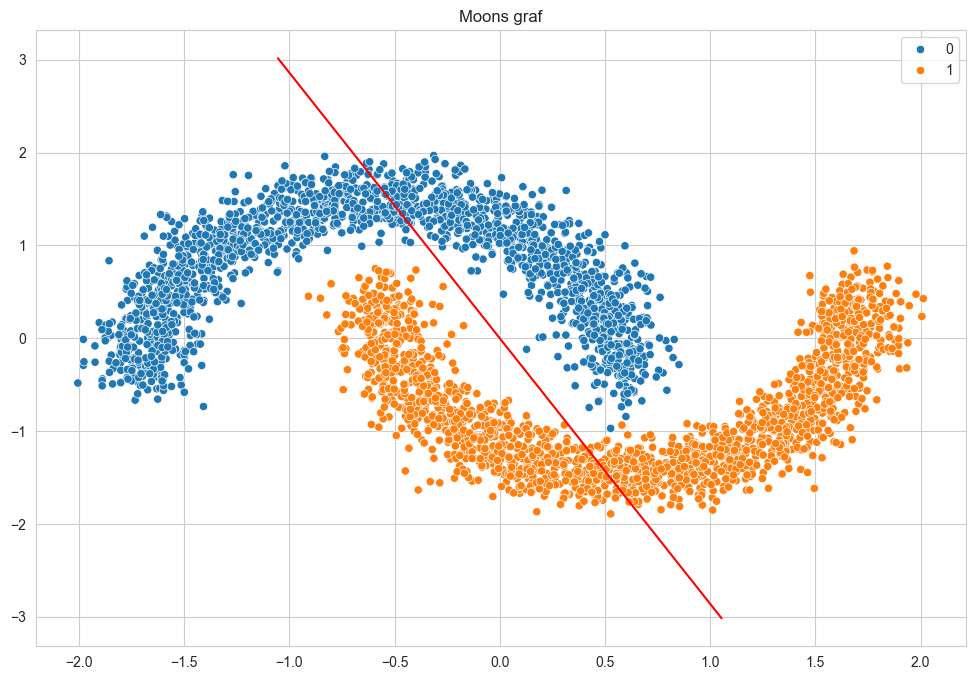

In [232]:
draw_moons(X_train_transformed, y_train)

sns.lineplot(x=line[0, :], y=line[1, :], color="red");

In [233]:
poly_X = PolynomialFeatures(degree=3)

In [234]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(poly_X.fit_transform(X),   y,    test_size=0.3, random_state=101)

In [235]:
log_reg_poly_model = LogisticRegression()
log_reg_poly_model

LogisticRegression()

In [236]:
log_reg_poly_model.fit(X_train_poly, y_train_poly)

LogisticRegression()

## Имба Рез

In [237]:
f1_score(y_test_poly, log_reg_poly_model.predict(X_test_poly))

0.9972972972972973

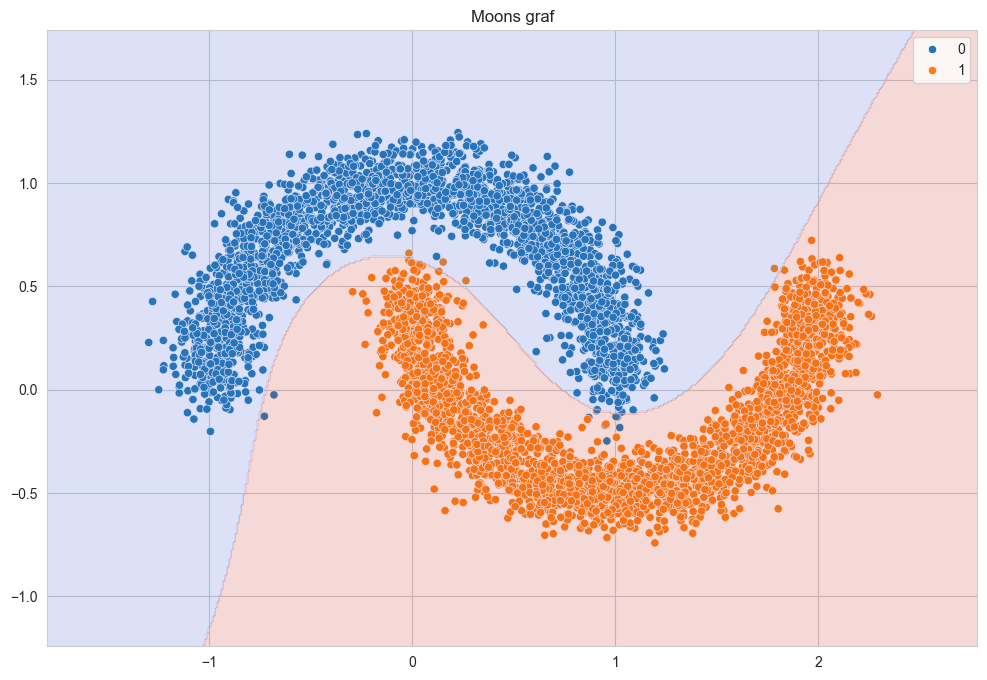

In [238]:
draw_moons(X, y)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

Z = log_reg_poly_model.predict(poly_X.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm");